In [11]:
#importing required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sc
import warnings
warnings.filterwarnings('ignore')


In [12]:
#reading the csv dataset file

data=pd.read_csv("googleplaystore.csv")

In [101]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [3]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,06-Jul-18,1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,20-Jan-17,1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device


## Data Cleaning

In [13]:
#Finding out the no of null values in each column of the dataset

data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [14]:
#Finding out the percentage of null values in each column of the dataset

(data.isnull().sum()/data.shape[0])*100

App                0.000000
Category           0.000000
Rating            13.596532
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.009224
Price              0.000000
Content Rating     0.009224
Genres             0.000000
Last Updated       0.000000
Current Ver        0.073794
Android Ver        0.027673
dtype: float64

In [15]:
#Finding the entries with rating value > 5.0

data[data['Rating']>5.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,11-Feb-18,1.0.19,4.0 and up,NaN


In [16]:
#Since we got the entry with rating value>5.0 is 19 here we are removing that entry from the dataset

data = data[data.Rating != 19]

In [17]:
#The columns Last Updated, Current Ver, Android Ver are not required for us, so we will take all the columns we require to 
#data1

data1=data[['App','Category','Rating','Reviews','Size','Installs','Type','Price','Content Rating','Genres']]

In [18]:
#Here we are finding the shape of the dataset i.e. no of rows and columns in the dataset

data1.shape

(10840, 10)

In [19]:
#Here we will try to fill the null entries in Rating column by Data imputation
#We will first find the mean, median, mode of Rating column

t_data=data1[pd.notnull(data1['Rating'])]
mean=np.mean(t_data['Rating'])
median=np.median(t_data['Rating'])
mode=sc.mode(t_data['Rating'])

print(mean,median,mode)

4.191757420456972 4.3 ModeResult(mode=array([4.4]), count=array([1109]))


In [20]:
#Here we will be imputing the Rating column using median that we calculated in above code

data1['Rating'].fillna(median,inplace=True)

# Here we are dropping the other null entries in the dataset because all the other na entries are few in number
data1.dropna(inplace=True)

In [21]:
# We will now be calculating the null values present after data cleaning
# Here we can see that now no null values are present

data1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64

In [22]:
# Here we are finding the percentage of duplicate entries present in the dataset data1

(data1.duplicated().value_counts()/data1.shape[0])*100

False    95.525417
True      4.474583
dtype: float64

In [23]:
# Here we are removing the duplicate entries in the dataset

data1=data1.drop_duplicates(subset='App', keep='first')

In [24]:
data1[data1['App']=='Facebook']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,"1,000,000,000+",Free,0,Teen,Social


In [25]:
# As we can see that the data in Installs column isn't present as required, so we do some modifications so that we could get
#desired data
# Modifications done are:
# Replacing , in Installs data with nothing
# Replacing + in Installs data with nothing
# Then we are converting the data to integer format

data1['Installs']=data1['Installs'].str.replace(',','').str.replace('+','').astype('int')


In [26]:
# As we can see that the data in Reviews column isn't present as required, so we do some modifications so that we could get
# desired data
# Modifications done are:
# We are converting the data to integer format

data1['Reviews']=data1['Reviews'].astype('int')

In [27]:
# As we can see that the data in Size column isn't present as required, so we are coverting the size from MB and KB to bytes
# Modifications done are:
# Replacing M in Size data with e+6 
# Replacing k in Size data with e+3
# Replacing varies with device in Size data with 0
# Then we are converting the data to float format

data1['Size']=data1['Size'].str.replace('M','e+6').str.replace('k','e+3').str.replace('Varies with device','0').astype('float')

In [28]:
# As we can see that the data in Price column isn't present as required, so we do some modifications so that we could get
#desired data
# Modifications done are:
# Replacing $ in Price data with nothing
# Then we are converting the data to float format

data1['Price']=data1['Price'].str.replace('$','').astype('float')

In [29]:
# By using head we will be having a look at first 10 entries after data cleaning

data1.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600000.0,50000,Free,0.0,Everyone,Art & Design
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000000.0,50000,Free,0.0,Everyone,Art & Design
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29000000.0,1000000,Free,0.0,Everyone,Art & Design
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33000000.0,1000000,Free,0.0,Everyone,Art & Design
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3100000.0,10000,Free,0.0,Everyone,Art & Design;Creativity


## Data Visualization

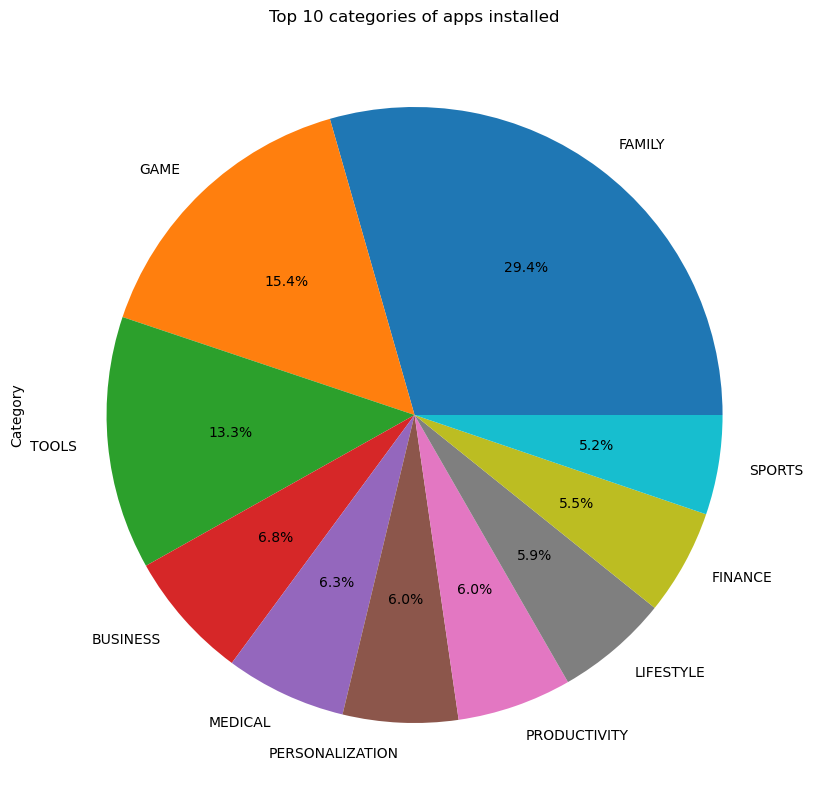

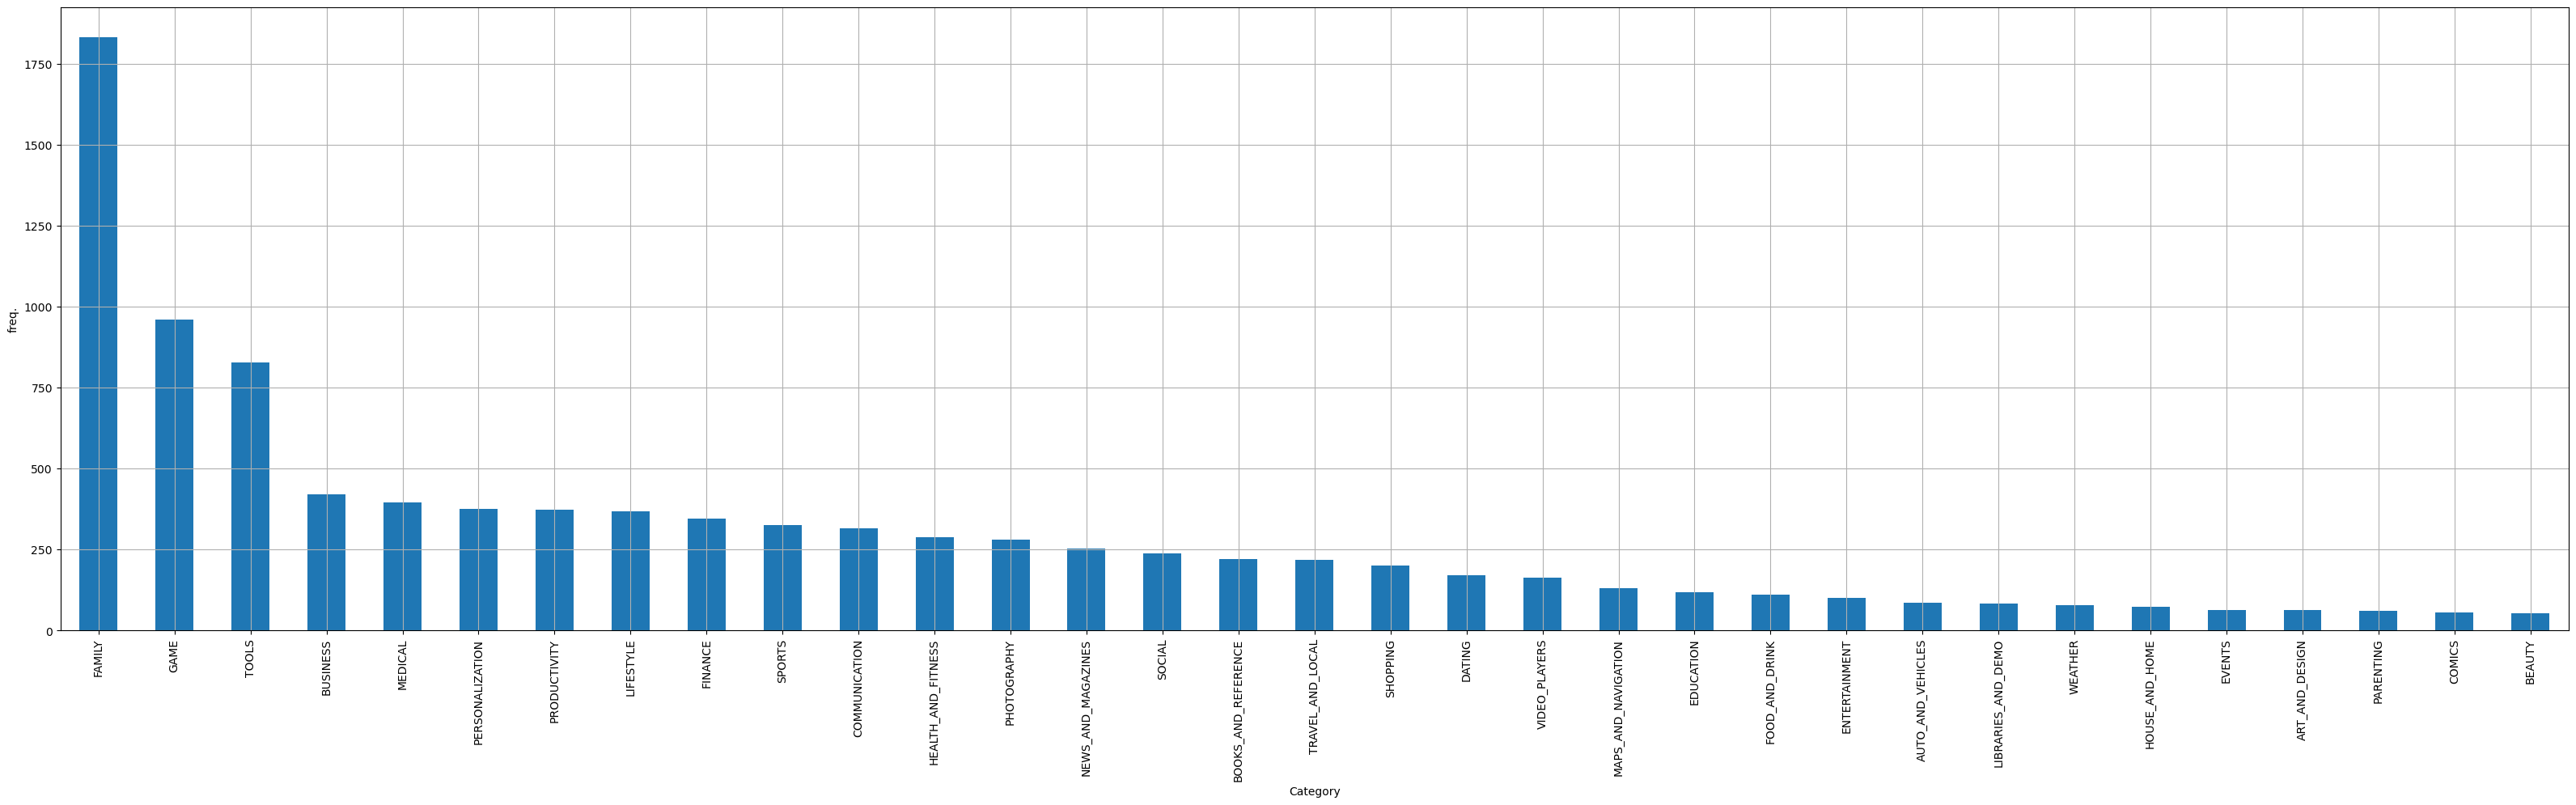

In [30]:
# Here we are plotting bar graph and pie chart for Category column to find out no of apps in each category

# Pie Chart
 
plt.figure(figsize=(40,10))
data1['Category'].value_counts().head(10).plot(kind='pie',autopct='%1.1f%%')
plt.title("Top 10 categories of apps installed")
plt.show()

# Bar Graph

plt.figure(figsize=(40,10))
data1['Category'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('freq.')
plt.grid()
plt.show()

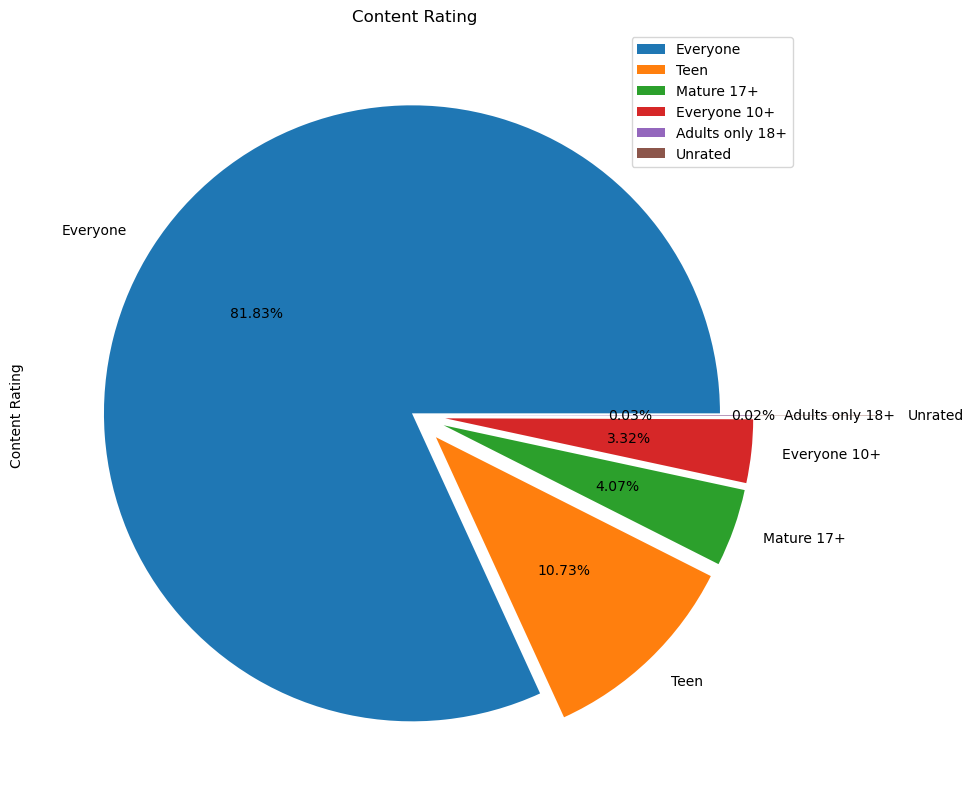

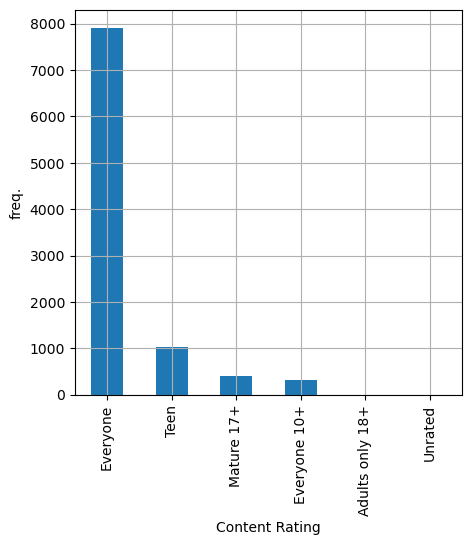

In [31]:
# Here we are plotting bar graph and pie chart for Content Rating column to find out no of apps in each Content Rating category

# Pie Chart

plt.figure(figsize=(40,10))
explode=[0.01,0.1,0.1,0.1,0.1,0.5]
data1['Content Rating'].value_counts().plot(kind='pie',autopct="%.2f%%",explode=explode)
plt.legend()
plt.title("Content Rating")
plt.show()

# Bar Graph

plt.figure(figsize=(5,5))
data1['Content Rating'].value_counts().plot(kind='bar')
plt.xlabel('Content Rating')
plt.ylabel('freq.')
plt.grid()
plt.show()

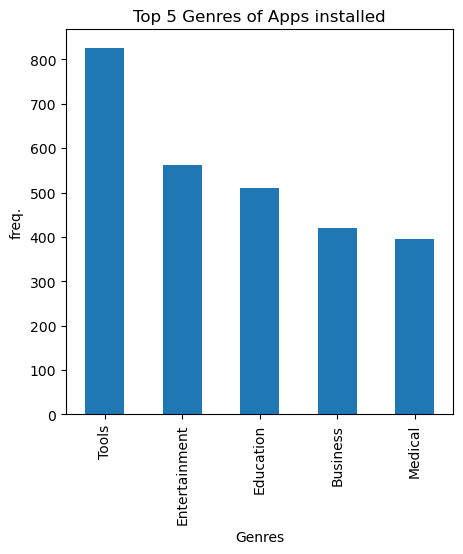

In [32]:
# Bar chart for top 5 genres of apps installed

plt.figure(figsize=(5,5))
data1['Genres'].value_counts().head(5).plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('freq.')
plt.title("Top 5 Genres of Apps installed")
plt.show()

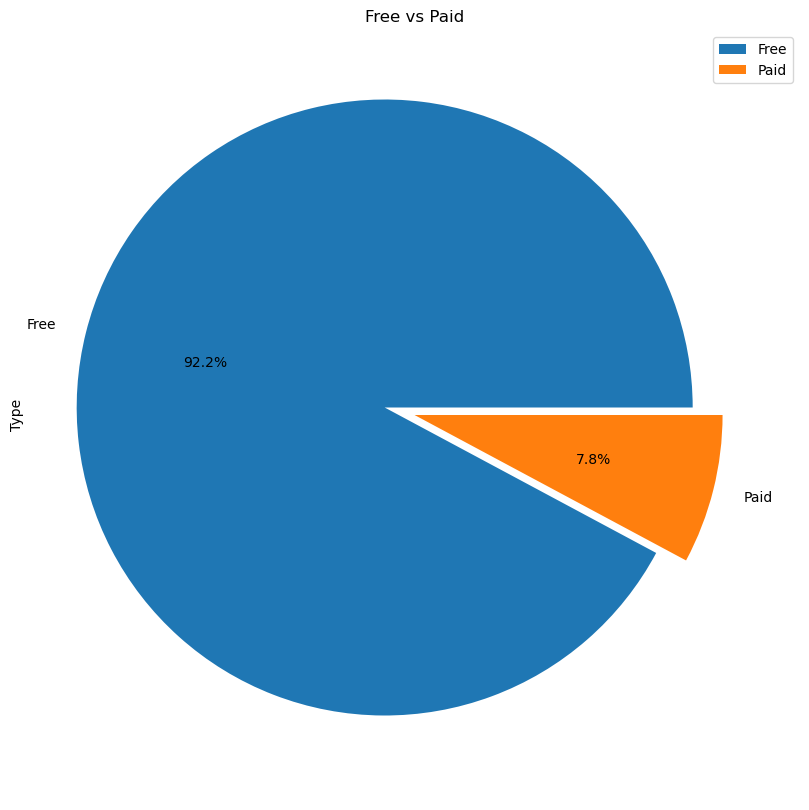

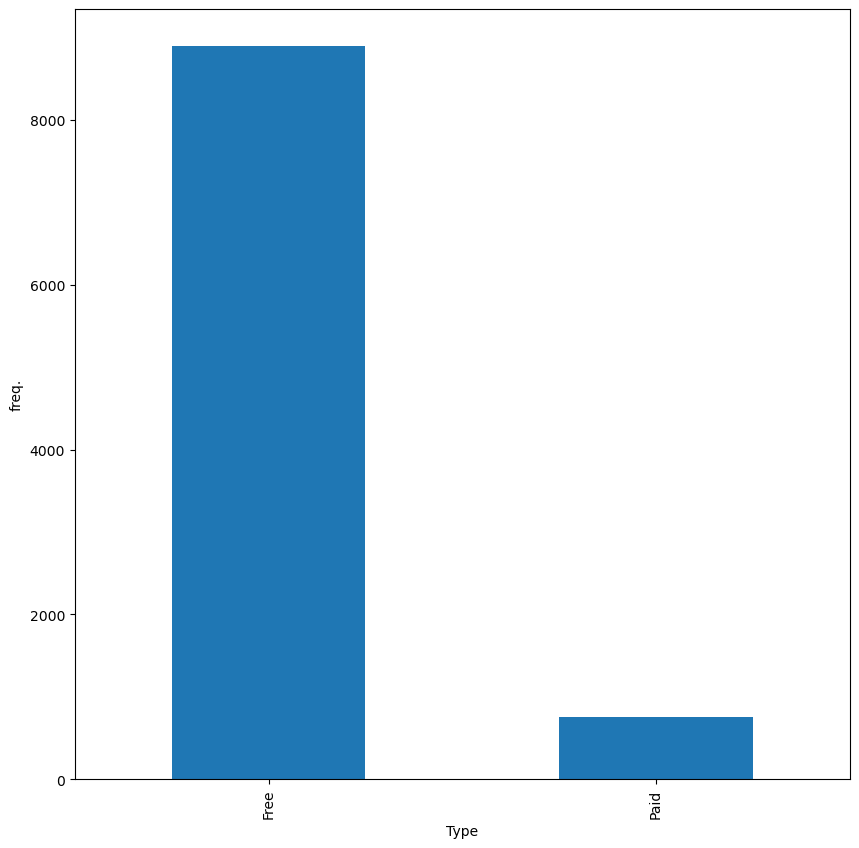

In [33]:
# Pie chart for no of apps in each Type of app i.e Free or Paid

plt.figure(figsize=(10,10))
explode=[0.1,0]
data1['Type'].value_counts().plot(kind='pie',autopct="%.1f%%",explode=explode)
plt.legend()
plt.title("Free vs Paid")
plt.show()
plt.figure(figsize=(10,10))

# Bar chart for no of apps in each Type of app i.e Free or Paid

data1['Type'].value_counts().plot(kind='bar')
plt.xlabel('Type')
plt.ylabel('freq.')
plt.show()


In [34]:
#Apps with largest size

data1[data1['Size']==data1['Size'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
1080,Post Bank,FINANCE,4.5,60449,100000000.0,1000000,Free,0.00,Everyone,Finance
1565,Talking Babsy Baby: Baby Games,LIFESTYLE,4.0,140995,100000000.0,10000000,Free,0.00,Everyone,Lifestyle;Pretend Play
1758,Hungry Shark Evolution,GAME,4.5,6074334,100000000.0,100000000,Free,0.00,Teen,Arcade
1793,Mini Golf King - Multiplayer Game,GAME,4.5,531458,100000000.0,5000000,Free,0.00,Everyone,Sports
2299,Navi Radiography Pro,MEDICAL,4.7,11,100000000.0,500,Paid,15.99,Everyone,Medical
4690,Vi Trainer,HEALTH_AND_FITNESS,3.6,124,100000000.0,5000,Free,0.00,Everyone,Health & Fitness
5427,Ultimate Tennis,SPORTS,4.3,183004,100000000.0,10000000,Free,0.00,Everyone,Sports
5530,The Walking Dead: Our World,GAME,4.0,22435,100000000.0,1000000,Free,0.00,Teen,Action
5862,Miami crime simulator,GAME,4.0,254518,100000000.0,10000000,Free,0.00,Mature 17+,Action
5865,Gangster Town: Vice District,FAMILY,4.3,65146,100000000.0,10000000,Free,0.00,Mature 17+,Simulation


In [35]:
#Apps with most no of installs

data1[data1['Installs']==data1['Installs'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,0.0,1000000000,Free,0.0,Teen,Books & Reference
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,0.0,1000000000,Free,0.0,Everyone,Communication
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,0.0,1000000000,Free,0.0,Everyone,Communication
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,0.0,1000000000,Free,0.0,Everyone,Communication
340,Gmail,COMMUNICATION,4.3,4604324,0.0,1000000000,Free,0.0,Everyone,Communication
341,Hangouts,COMMUNICATION,4.0,3419249,0.0,1000000000,Free,0.0,Everyone,Communication
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,0.0,1000000000,Free,0.0,Everyone,Communication
865,Google Play Games,ENTERTAINMENT,4.3,7165362,0.0,1000000000,Free,0.0,Teen,Entertainment
1654,Subway Surfers,GAME,4.5,27722264,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade
2544,Facebook,SOCIAL,4.1,78158306,0.0,1000000000,Free,0.0,Teen,Social


In [36]:
# Apps with largest number of reviews

data1[data1['Reviews']==data1['Reviews'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
2544,Facebook,SOCIAL,4.1,78158306,0.0,1000000000,Free,0.0,Teen,Social


Text(0.5, 1.0, 'Apps with most reviews')

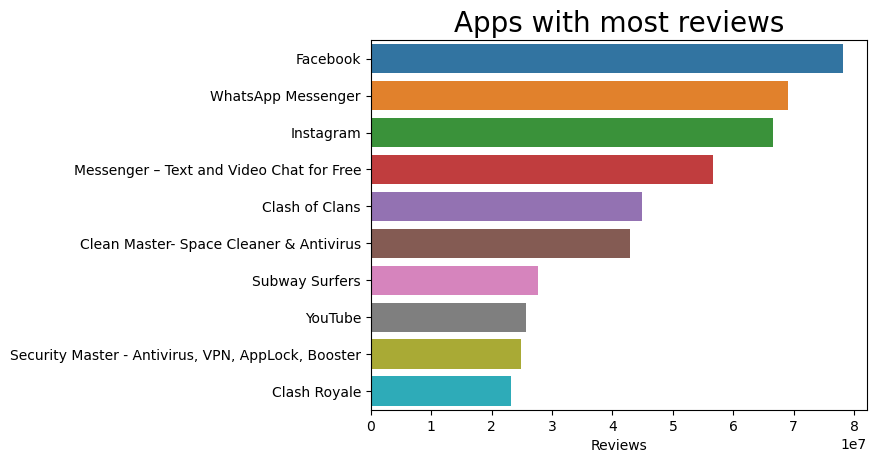

In [37]:
# Here we are visualizing top 10 apps with more no of reviews

import seaborn as sns
sorte = data1.sort_values(['Reviews'],ascending = 0 )[:10]
ax = sns.barplot(x = 'Reviews' , y = 'App', data = sorte  )
ax.set_xlabel('Reviews')
ax.set_ylabel('')
ax.set_title("Apps with most reviews", size = 20)

Text(0.5, 1.0, 'Most Popular Family Category Apps in Play Store')

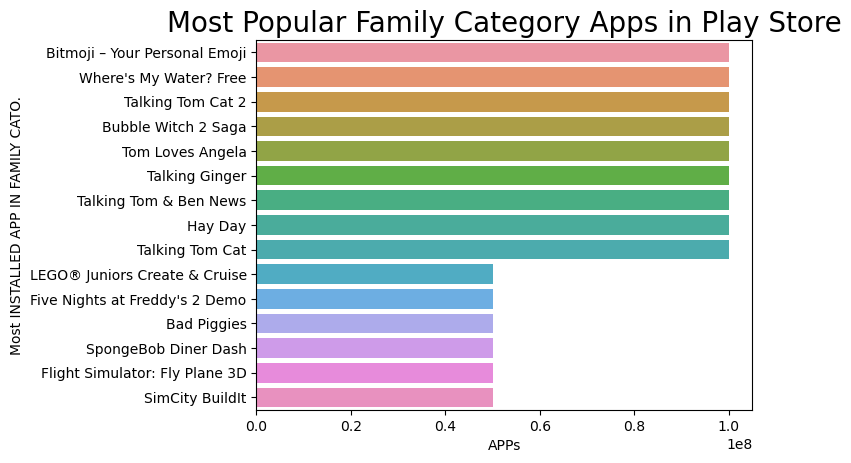

In [38]:
# Here we are taking apps in family category and sorting them based on no of installs

data_cat=data1[data1['Category']=='FAMILY'].sort_values(['Installs'],ascending=0)[:15]

ax = sns.barplot(x = 'Installs' , y = 'App' , data = data_cat )
ax.set_xlabel('APPs')
ax.set_ylabel('Most INSTALLED APP IN FAMILY CATO.')
ax.set_title("Most Popular Family Category Apps in Play Store", size = 20)

Text(0.5, 1.0, 'Most Popular Games in Play Store')

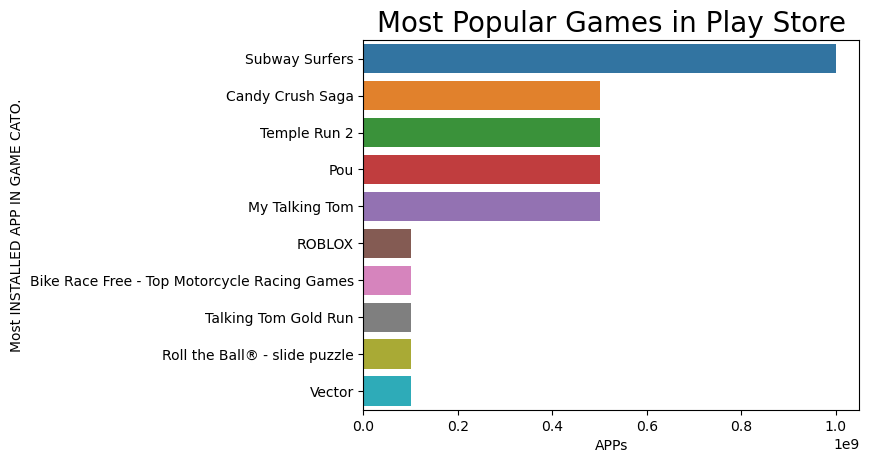

In [39]:
# Here we are taking apps in game category and sorting them based on no of installs

data_cat=data1[data1['Category']=='GAME'].sort_values(['Installs'],ascending=0)[:10]

ax = sns.barplot(x = 'Installs' , y = 'App' , data = data_cat )
ax.set_xlabel('APPs')
ax.set_ylabel('Most INSTALLED APP IN GAME CATO.')
ax.set_title("Most Popular Games in Play Store", size = 20)

Text(0.5, 1.0, 'Most Popular Tool Category Apps in Play Store')

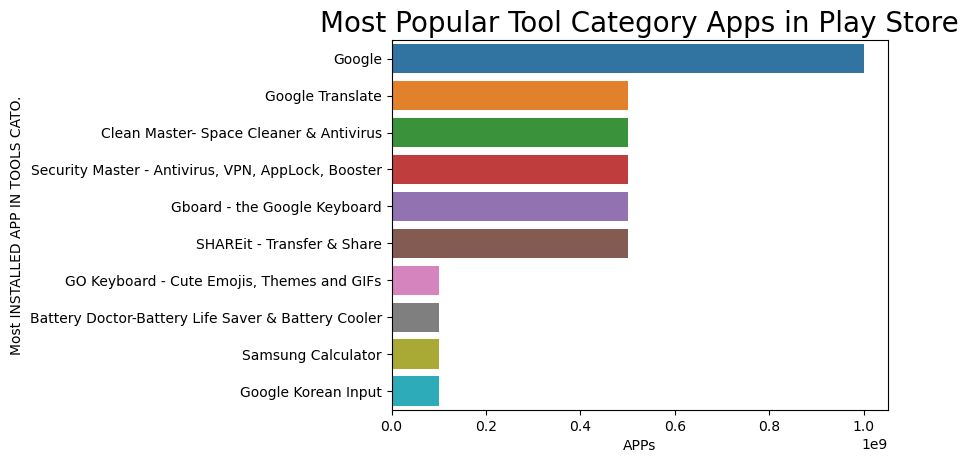

In [40]:
# Here we are taking apps in tools category and sorting them based on no of installs

data_cat=data1[data1['Category']=='TOOLS'].sort_values(['Installs'],ascending=0)[:10]

ax = sns.barplot(x = 'Installs' , y = 'App' , data = data_cat )
ax.set_xlabel('APPs')
ax.set_ylabel('Most INSTALLED APP IN TOOLS CATO.')
ax.set_title("Most Popular Tool Category Apps in Play Store", size = 20)

Text(0.5, 1.0, 'Most Popular Business Category Apps in Play Store')

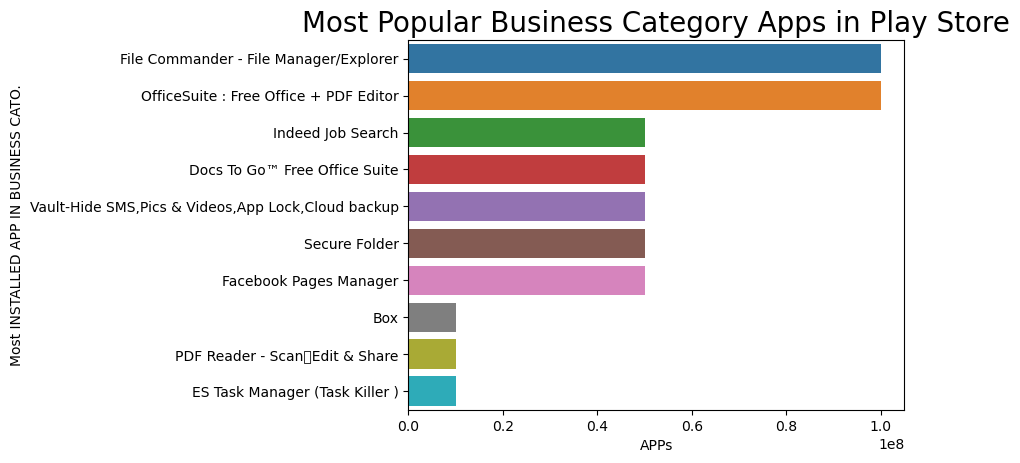

In [41]:
# Here we are taking apps in business category and sorting them based on no of installs

data_cat=data1[data1['Category']=='BUSINESS'].sort_values(['Installs'],ascending=0)[:10]

ax = sns.barplot(x = 'Installs' , y = 'App' , data = data_cat )
ax.set_xlabel('APPs')
ax.set_ylabel('Most INSTALLED APP IN BUSINESS CATO.')
ax.set_title("Most Popular Business Category Apps in Play Store", size = 20)

## Predicting Rating of Apps using Machine Learning techniques 

In [42]:
# Converting Category column categorical data into dummy or indicator variables.

dummy_C = pd.get_dummies(data1['Category'])
del dummy_C[dummy_C.columns[-1]]#To avoid dummy variable trap
data1 = pd.concat([data1, dummy_C], axis = 1)

In [43]:
data1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,PARENTING,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,...,0,0,0,0,0,0,0,0,0,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,0,0,0,0,0,0,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,...,0,0,0,0,0,0,0,0,0,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,...,0,0,0,0,0,0,0,0,0,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# Converting Type column categorical data into dummy or indicator variables.

dummy_T = pd.get_dummies(data1['Type'])
del dummy_T[dummy_T.columns[-1]]#To avoid dummy variable trap
data1 = pd.concat([data1, dummy_T], axis = 1)

In [45]:
# Converting Genres column categorical data into dummy or indicator variables.

dummy_G = pd.get_dummies(data1["Genres"])
del dummy_G[dummy_G.columns[-1]]#To avoid dummy variable trap
data1 = pd.concat([data1, dummy_G], axis = 1)

In [46]:
# Converting Content Rating column categorical data into dummy or indicator variables.

dummy = pd.get_dummies(data1['Content Rating'])
del dummy[dummy.columns[-1]]
data1 = pd.concat([data1, dummy], axis = 1)

In [47]:
data1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Trivia;Education,Video Players & Editors,Video Players & Editors;Creativity,Video Players & Editors;Music & Video,Weather,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,...,0,0,0,0,0,0,1,0,0,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,0,0,0,0,0,0,1,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,...,0,0,0,0,0,0,1,0,0,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,...,0,0,0,0,0,0,0,0,0,1
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,...,0,0,0,0,0,0,1,0,0,0


In [48]:
data1.shape

(9658, 165)

In [49]:
# Eliminating categorical data from the dataset

datamodel = data1.drop(["Category", "Type", "Content Rating", "Genres", "App"], axis =1)

In [50]:
datamodel

,Rating,Reviews,Size,Installs,Price,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,...,Trivia;Education,Video Players & Editors,Video Players & Editors;Creativity,Video Players & Editors;Music & Video,Weather,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen
0,4.1,159,19000000.0,10000,0.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,3.9,967,14000000.0,500000,0.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,4.7,87510,8700000.0,5000000,0.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4.5,215644,25000000.0,50000000,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4.3,967,2800000.0,100000,0.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,4.5,38,53000000.0,5000,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10837,5.0,4,3600000.0,100,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10838,4.3,3,9500000.0,1000,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10839,4.5,114,0.0,1000,0.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [51]:
datamodel.shape

(9658, 160)

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
# Splitting data for training and testing models

X = datamodel.loc[:, datamodel.columns != "Rating"]

In [54]:
y = datamodel['Rating']

In [55]:
# 70% of data is used for training and 30% of data is used for testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

### Linear Regression

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
lr = LinearRegression()

In [58]:
# Creating a linear regression model and fitting the training data in it

model_lr= lr.fit(X_train, y_train)

In [59]:
# Predicting the outcome by testing the model on testing data

y_pred_lr = model_lr.predict(X_test)

In [60]:
y_pred_lr

array([4.07172325, 4.16341363, 4.1490171 , ..., 4.30848084, 4.13035706,
       4.2669056 ])

In [61]:
# Comparing predicted and actual data

predict_dataframe_lr = pd.DataFrame(data={"Predicted": y_pred_lr, "Actual": y_test})

In [62]:
predict_dataframe_lr

,Predicted,Actual
8045,4.071723,3.1
9038,4.163414,4.3
1489,4.149017,4.3
6750,4.075020,4.3
3378,4.290334,4.3
...,...,...
1435,4.265110,4.8
127,4.226225,4.6
2255,4.308481,4.4
925,4.130357,4.0


<Axes: >

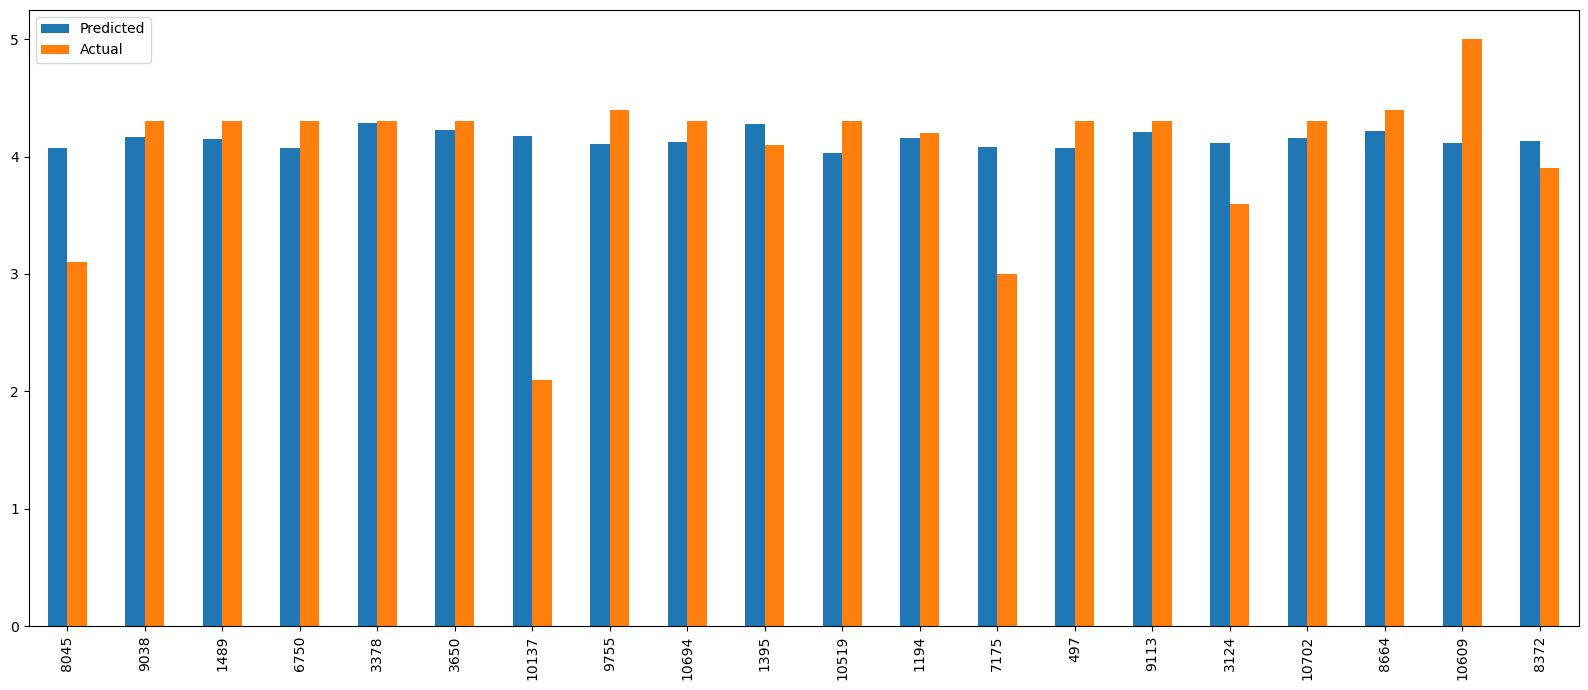

In [63]:
# Comparing predicted and actual data using bar chart

predict_dataframe_lr[:20].plot(kind = "bar", figsize = (20,8))

In [64]:
# Here we got mean squared error as 25% approx which means the prediction was almost 75% correct

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred_lr)*100

24.90926324872763

### Random Forest Regression 

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
rfr = RandomForestRegressor()

In [67]:
# Creating a Random Forest Regression model and fitting the training data in it

modef_rfr = rfr.fit(X_train, y_train)

In [68]:
# Predicting the outcome by testing the model on testing data

y_pred_rfr = modef_rfr.predict(X_test)

In [69]:
# Comparing predicted and actual data

rfr_df = pd.DataFrame(data={"Predicted": y_pred_rfr, "Actual": y_test})

In [70]:
rfr_df

,Predicted,Actual
8045,4.039,3.1
9038,4.135,4.3
1489,4.256,4.3
6750,4.307,4.3
3378,4.490,4.3
...,...,...
1435,4.400,4.8
127,4.206,4.6
2255,4.255,4.4
925,4.060,4.0


<Axes: >

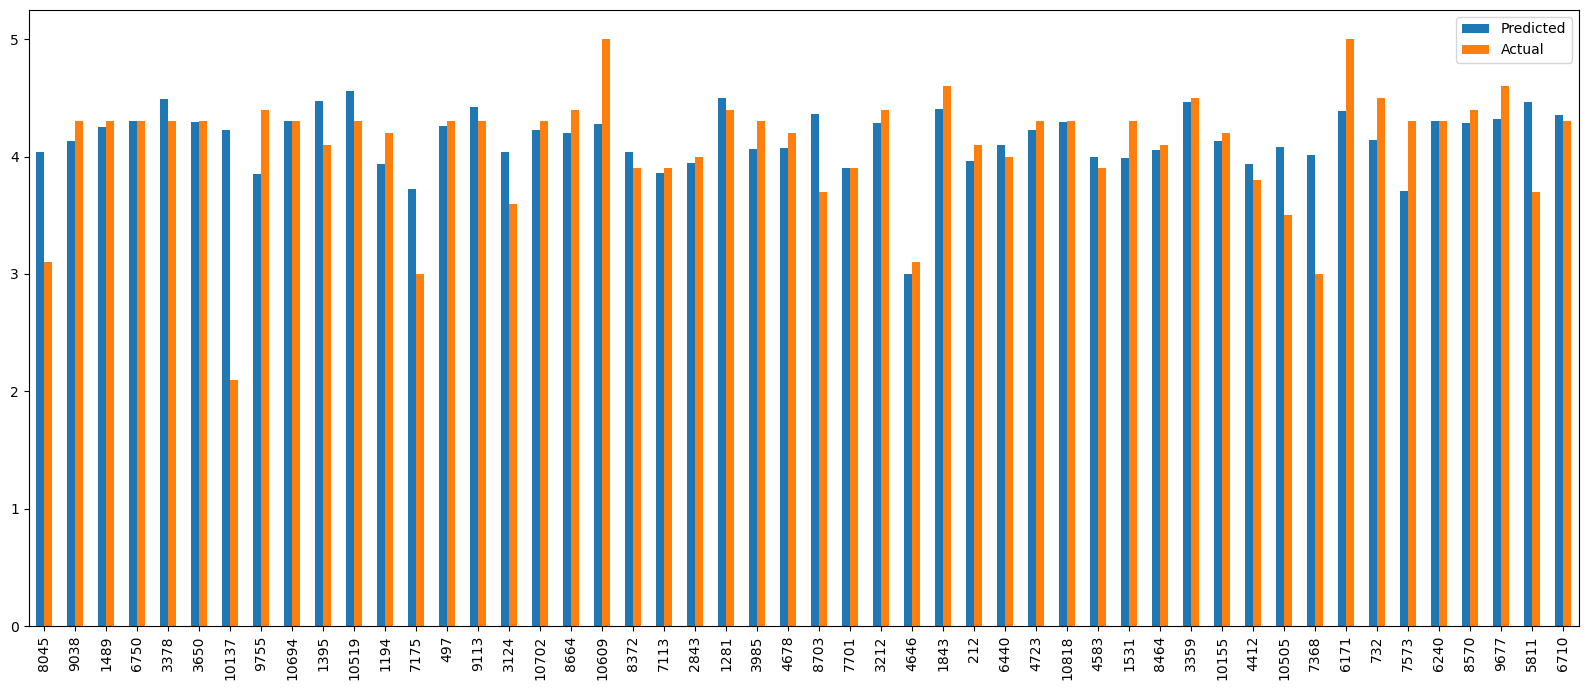

In [71]:
# Comparing predicted and actual data using bar chart

rfr_df[:50].plot(kind = "bar", figsize = (20,8))

In [72]:
# Here we got mean squared error as 23% approx which means the prediction was almost 77% correct

mean_squared_error(y_test, y_pred_rfr)*100

23.351350880014216

### Catboost Regression 

In [74]:
#!pip install catboost


  Obtaining dependency information for catboost from https://files.pythonhosted.org/packages/e2/63/379617e3d982e8a66c9d66ebf4621d3357c7c18ad356473c335bffd5aba6/catboost-1.2.2-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     ---------------------------------------- 47.0/47.0 kB 2.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/101.0 MB ? eta -:--:--
   ---------------------------------------- 0.6/101.0 MB 12.4 MB/s eta 0:00:09
   ---------------------------------------- 0.8/101.0 MB 8.1 MB/s eta 0:00:13
   ---------------------------------------- 0.9/101.0 MB 6.6 MB/s eta 0:00:16
   ---------------------------------------- 0.9/101.0 MB 6.6 MB/s eta 0:00:16
   ---------------------------------------- 1.0/101.0 MB 4.1 MB/s eta 0:00:25
   ---------------------------------------- 1.2/101.0 MB 4.3 MB/s eta 0:00:24
    --------------------------------------- 1.4/101.0 MB 4.3 MB/s eta 0:00:23
    ----------------

In [75]:
from catboost import CatBoostRegressor

In [76]:
model_cb = CatBoostRegressor(task_type='CPU', iterations=100, 
                              random_state = 42)

In [77]:
# Creating a Catboost Regression  model and fitting the training data in it

model_cb.fit(X_train, y_train, plot=True, 
             eval_set=(X_test, y_test))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.280025
0:	learn: 0.4842173	test: 0.4966851	best: 0.4966851 (0)	total: 153ms	remaining: 15.1s
1:	learn: 0.4786077	test: 0.4910628	best: 0.4910628 (1)	total: 163ms	remaining: 7.99s
2:	learn: 0.4750894	test: 0.4872386	best: 0.4872386 (2)	total: 173ms	remaining: 5.61s
3:	learn: 0.4721074	test: 0.4843745	best: 0.4843745 (3)	total: 184ms	remaining: 4.41s
4:	learn: 0.4697902	test: 0.4819097	best: 0.4819097 (4)	total: 196ms	remaining: 3.73s
5:	learn: 0.4686191	test: 0.4803342	best: 0.4803342 (5)	total: 209ms	remaining: 3.27s
6:	learn: 0.4676247	test: 0.4792023	best: 0.4792023 (6)	total: 220ms	remaining: 2.92s
7:	learn: 0.4662788	test: 0.4780563	best: 0.4780563 (7)	total: 230ms	remaining: 2.65s
8:	learn: 0.4654706	test: 0.4772154	best: 0.4772154 (8)	total: 242ms	remaining: 2.45s
9:	learn: 0.4644282	test: 0.4764190	best: 0.4764190 (9)	total: 255ms	remaining: 2.29s
10:	learn: 0.4639779	test: 0.4758601	best: 0.4758601 (10)	total: 265ms	remaining: 2.14s
11:	learn: 0.4627540	t

In [78]:
# Predicting the outcome by testing the model on testing data

y_pred_cb = model_cb.predict(X_test)

In [79]:
y_pred_cb

array([4.09019948, 4.0236284 , 4.08462557, ..., 4.35234728, 4.03777258,
       4.15766324])

In [80]:
# Comparing predicted and actual data

cbr_df = pd.DataFrame(data={"Predicted": y_pred_cb, "Actual": y_test})

In [81]:
cbr_df

,Predicted,Actual
8045,4.090199,3.1
9038,4.023628,4.3
1489,4.084626,4.3
6750,4.299213,4.3
3378,4.371244,4.3
...,...,...
1435,4.400375,4.8
127,4.064663,4.6
2255,4.352347,4.4
925,4.037773,4.0


<Axes: >

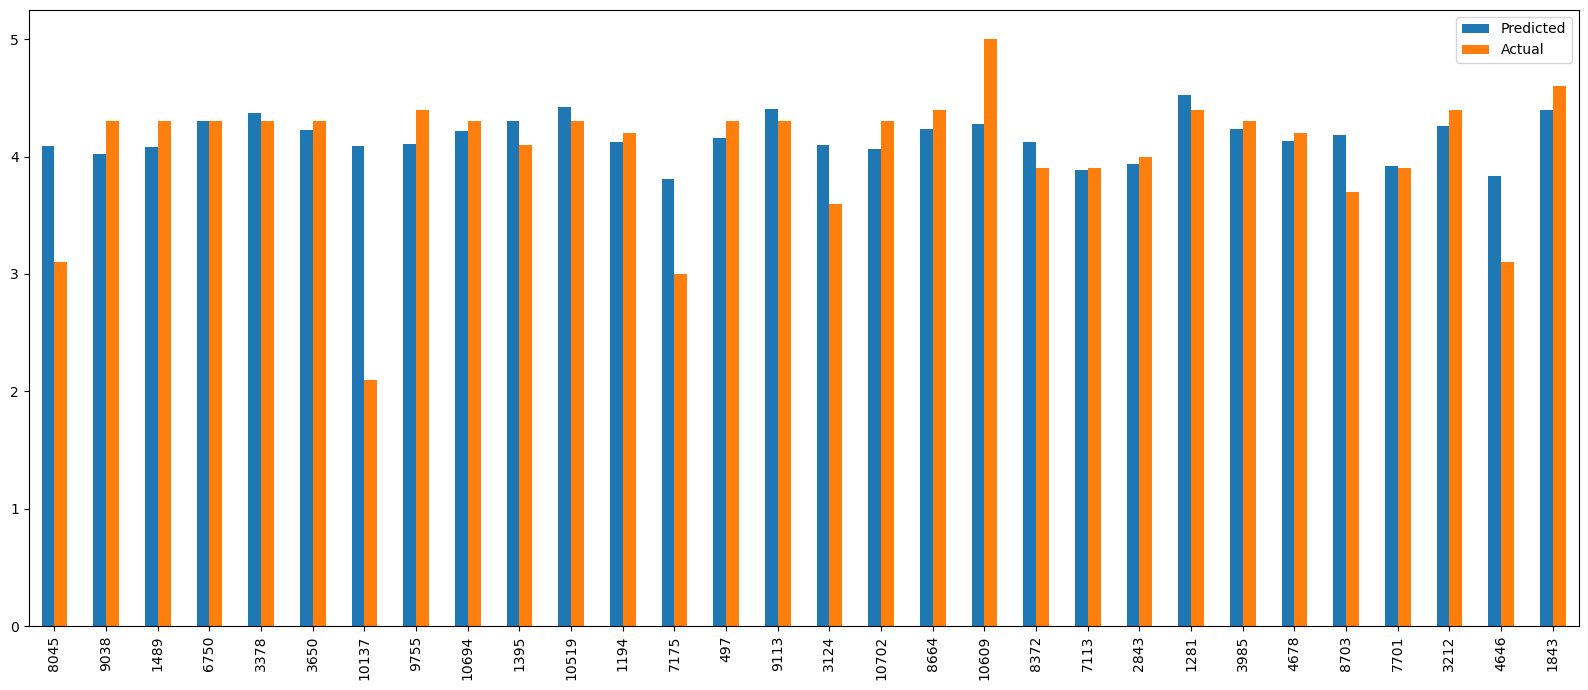

In [82]:
# Comparing predicted and actual data using bar chart

cbr_df[:30].plot(kind = "bar", figsize = (20,8))

In [83]:
mean_squared_error(y_test, y_pred_cb)

0.21235982574631623

### XGBoost Regression 

In [85]:
#pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/32/10/4689bda37403f7dd029d550c4446e0097c2f33b8ae877b235e76d5c49bc2/xgboost-2.0.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.3/99.7 MB 10.2 MB/s eta 0:00:10
   ---------------------------------------- 0.7/99.7 MB 9.5 MB/s eta 0:00:11
   ---------------------------------------- 0.9/99.7 MB 6.5 MB/s eta 0:00:16
   ---------------------------------------- 1.0/99.7 MB 6.7 MB/s eta 0:00:15
   ---------------------------------------- 1.0/99.7 MB 6.7 MB/s eta 0:00:15
   ---------------------------------------- 1.1/99.7 MB 4.0 MB/s eta 0:00:25
    --------------------------------------- 1.4/99.7 MB 4.3 MB/s eta 0:00:23
    --------------------------------------- 1.5/99.7 MB 4.2 MB/s eta 0:00:24
    --------------------------------------- 1.7/99.7 MB 4.2 MB/s eta 0:00:24
    ---------------------------

In [86]:
import xgboost

In [87]:
from xgboost import XGBRegressor

In [88]:
model_xg=XGBRegressor()

In [89]:
# Creating a XGBoost Regression model and fitting the training data in it

model_xg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [90]:
# Predicting the outcome by testing the model on testing data

y_pred_xg = model_xg.predict(X_test)

In [91]:
y_pred_xg

array([4.2384305, 4.0554385, 4.356586 , ..., 4.0342565, 4.0434113,
       4.0751114], dtype=float32)

In [92]:
# Comparing predicted and actual data

xgb_df = pd.DataFrame(data={"Predicted": y_pred_xg, "Actual": y_test})

In [93]:
xgb_df

,Predicted,Actual
8045,4.238431,3.1
9038,4.055439,4.3
1489,4.356586,4.3
6750,4.334033,4.3
3378,4.363669,4.3
...,...,...
1435,4.459511,4.8
127,4.081334,4.6
2255,4.034256,4.4
925,4.043411,4.0


<Axes: >

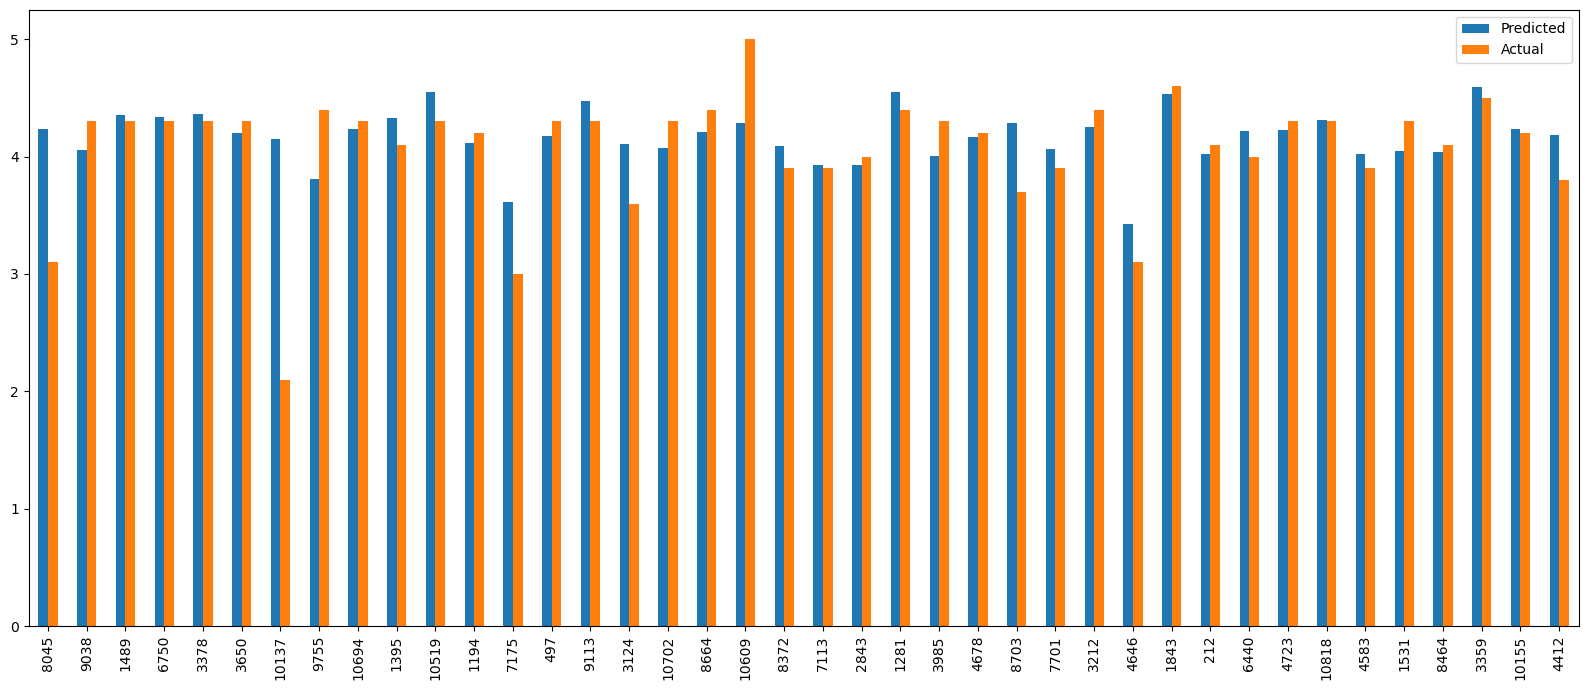

In [94]:
# Comparing predicted and actual data using bar chart

xgb_df[:40].plot(kind = "bar", figsize = (20,8))

In [95]:
mean_squared_error(y_test, y_pred_xg)

0.22565255377669108

In [98]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_xg)

0.11672152985803153

In [99]:
print("Linear Regression Score: ", model_lr.score(X_test, y_test))
print("Random Forest Regressor Score: ", modef_rfr.score(X_test, y_test))
print("CatBoost Regressor Score: ", model_cb.score(X_test, y_test))
print("XGBoost Regressor Score: ", model_xg.score(X_test, y_test))

Linear Regression Score:  0.024969335978665463
Random Forest Regressor Score:  0.08595116094015987
CatBoost Regressor Score:  0.16875364862723463
XGBoost Regressor Score:  0.11672152985803153
